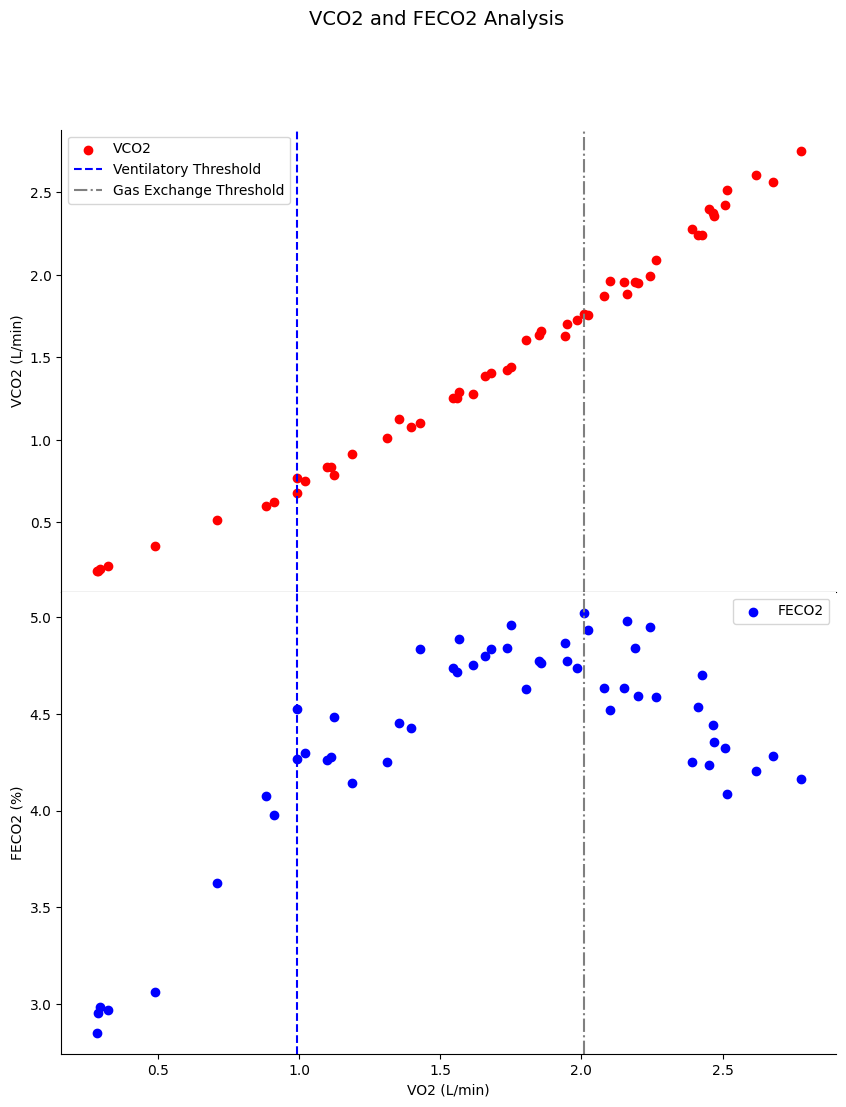

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read File
df = pd.read_csv('..//input/subject-1321-csv/subject_1321.csv')

# Rename columns 
df = df.rename(columns={'VE/': 'VE/VO2', 'VE/.1': 'VE/VCO2'})

# Convert columns to numeric values
numeric_cols = ['TIME', 'VO2', 'VE', 'VCO2', 'FECO2', 'VE/VO2', 'VE/VCO2']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce') #errors replaces non numeric values with NaN

# Extract columns for plotting
x = df['VO2']  # VO2 as x-axis for second set of plots
y1 = df['VCO2']
y2 = df['FECO2']

# Identify thresholds
get_idx = df['VE/VCO2'].idxmin()  # Gas Exchange Threshold (GET) - min VE/VCO2
vt_idx = df['VE/VO2'].idxmin()    # Ventilatory Threshold (VT) - min VE/VO2

get_vo2 = x[get_idx]
vt_vo2 = x[vt_idx]

# Setup for plotting the Figure
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 12))
fig.subplots_adjust(hspace=0) #removes spaces

# Plot VCO2 
ax[0].scatter(x, y1, color='red', label='VCO2')
ax[0].axvline(x=vt_vo2, color='blue', linestyle='--', label="Ventilatory Threshold")
ax[0].axvline(x=get_vo2, color='gray', linestyle='-.', label="Gas Exchange Threshold")
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].set(ylabel='VCO2 (L/min)')
ax[0].legend()

# Plot FECO2 
ax[1].scatter(x, y2, color='blue', label='FECO2')
ax[1].axvline(x=vt_vo2, color='blue', linestyle='--')
ax[1].axvline(x=get_vo2, color='gray', linestyle='-.')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel='FECO2 (%)', xlabel='VO2 (L/min)')
ax[1].legend()

# Save the Figure
fig.suptitle("VCO2 and FECO2 Analysis", fontsize=14)
fig.savefig("VCO2_FECO2_Analysis.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()